<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_2_n60_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_2'

In [4]:
os.listdir(base_path)

['data_add_delta_2_n20.csv',
 'data_add_delta_2_n30.csv',
 'data_add_delta_2_n60.csv',
 'data_add_delta_2_n120.csv',
 'data_add_delta_2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_2_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,91.775329,20.267232,65.759543,-456.561762,-268.759658,114.504626,-383.264284
1,0.0,1.0,97.782076,44.502668,78.483007,1925.290840,2156.058592,-1753.198601,3909.257193
2,0.0,2.0,43.114231,83.420544,34.118264,-11784.044434,-11613.391394,-932.516187,-10680.875208
3,0.0,3.0,56.042415,60.297416,24.740782,3407.018035,3558.098648,-178.160166,3736.258814
4,0.0,4.0,44.165499,30.793449,65.555487,418.127977,568.642413,2060.452662,-1491.810249
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,60.647884,22.649264,47.504204,480.844840,621.646192,-109.840020,731.486212
59996,999.0,56.0,68.068817,90.808650,78.009626,6449.829807,6696.716900,3111.269294,3585.447605
59997,999.0,57.0,32.044819,50.306987,83.811518,274.629539,450.792864,209.897205,240.895659
59998,999.0,58.0,93.471450,22.624272,35.841776,-134.975097,26.962401,1070.509538,-1043.547136


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,91.775329,20.267232,65.759543,-456.561762,-268.759658,114.504626,-383.264284
1,0.0,1.0,97.782076,44.502668,78.483007,1925.290840,2156.058592,-1753.198601,3909.257193
2,0.0,2.0,43.114231,83.420544,34.118264,-11784.044434,-11613.391394,-932.516187,-10680.875208
3,0.0,3.0,56.042415,60.297416,24.740782,3407.018035,3558.098648,-178.160166,3736.258814
4,0.0,4.0,44.165499,30.793449,65.555487,418.127977,568.642413,2060.452662,-1491.810249
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,60.647884,22.649264,47.504204,480.844840,621.646192,-109.840020,731.486212
59996,999.0,56.0,68.068817,90.808650,78.009626,6449.829807,6696.716900,3111.269294,3585.447605
59997,999.0,57.0,32.044819,50.306987,83.811518,274.629539,450.792864,209.897205,240.895659
59998,999.0,58.0,93.471450,22.624272,35.841776,-134.975097,26.962401,1070.509538,-1043.547136


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...        y_hat         e_hat
rep   index                        ...                           
0.0   0.0    91.775329  20.267232  ...   114.504626   -383.264284
      1.0    97.782076  44.502668  ... -1753.198601   3909.257193
      2.0    43.114231  83.420544  ...  -932.516187 -10680.875208
      3.0    56.042415  60.297416  ...  -178.160166   3736.258814
      4.0    44.165499  30.793449  ...  2060.452662  -1491.810249
...                ...        ...  ...          ...           ...
999.0 55.0   60.647884  22.649264  ...  -109.840020    731.486212
      56.0   68.068817  90.808650  ...  3111.269294   3585.447605
      57.0   32.044819  50.306987  ...   209.897205    240.895659
      58.0   93.471450  22.624272  ...  1070.509538  -1043.547136
      59.0   64.099818  78.122672  ...  2428.439402   1784.195788

[60000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...        y_hat         e_hat
rep   index                        ...                           
0.0   0.0    91.775329  20.267232  ...   114.504626   -383.264284
      1.0    97.782076  44.502668  ... -1753.198601   3909.257193
      2.0    43.114231  83.420544  ...  -932.516187 -10680.875208
      3.0    56.042415  60.297416  ...  -178.160166   3736.258814
      4.0    44.165499  30.793449  ...  2060.452662  -1491.810249
...                ...        ...  ...          ...           ...
999.0 55.0   60.647884  22.649264  ...  -109.840020    731.486212
      56.0   68.068817  90.808650  ...  3111.269294   3585.447605
      57.0   32.044819  50.306987  ...   209.897205    240.895659
      58.0   93.471450  22.624272  ...  1070.509538  -1043.547136
      59.0   64.099818  78.122672  ...  2428.439402   1784.195788

[60000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,91.775329,20.267232,65.759543,-456.561762,-268.759658,114.504626,-383.264284
1,0.0,1.0,97.782076,44.502668,78.483007,1925.290840,2156.058592,-1753.198601,3909.257193
2,0.0,2.0,43.114231,83.420544,34.118264,-11784.044434,-11613.391394,-932.516187,-10680.875208
3,0.0,3.0,56.042415,60.297416,24.740782,3407.018035,3558.098648,-178.160166,3736.258814
4,0.0,4.0,44.165499,30.793449,65.555487,418.127977,568.642413,2060.452662,-1491.810249
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,60.647884,22.649264,47.504204,480.844840,621.646192,-109.840020,731.486212
59996,999.0,56.0,68.068817,90.808650,78.009626,6449.829807,6696.716900,3111.269294,3585.447605
59997,999.0,57.0,32.044819,50.306987,83.811518,274.629539,450.792864,209.897205,240.895659
59998,999.0,58.0,93.471450,22.624272,35.841776,-134.975097,26.962401,1070.509538,-1043.547136


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2  ...        y_hat         e_hat
rep   index                        ...                           
0.0   0.0    91.775329  20.267232  ...   114.504626   -383.264284
      1.0    97.782076  44.502668  ... -1753.198601   3909.257193
      2.0    43.114231  83.420544  ...  -932.516187 -10680.875208
      3.0    56.042415  60.297416  ...  -178.160166   3736.258814
      4.0    44.165499  30.793449  ...  2060.452662  -1491.810249
...                ...        ...  ...          ...           ...
999.0 55.0   60.647884  22.649264  ...  -109.840020    731.486212
      56.0   68.068817  90.808650  ...  3111.269294   3585.447605
      57.0   32.044819  50.306987  ...   209.897205    240.895659
      58.0   93.471450  22.624272  ...  1070.509538  -1043.547136
      59.0   64.099818  78.122672  ...  2428.439402   1784.195788

[60000 rows x 7 columns]

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]

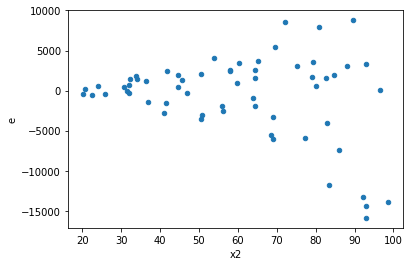

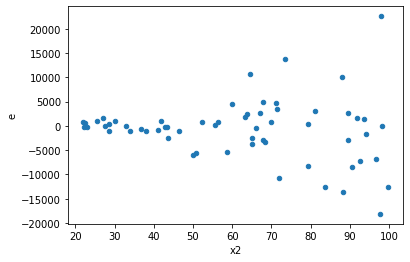

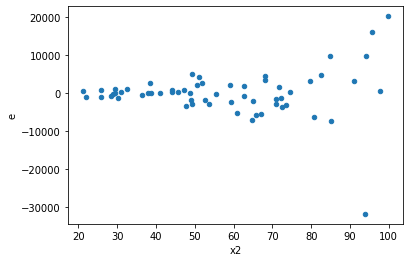

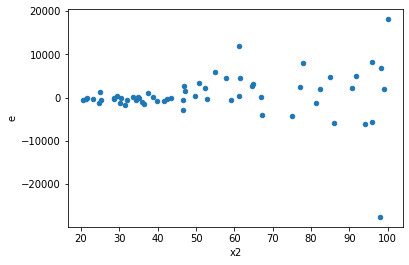

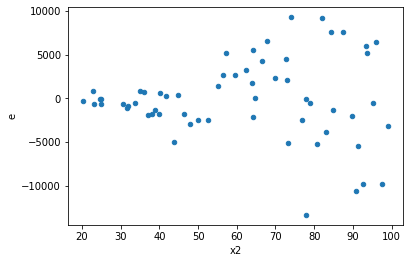

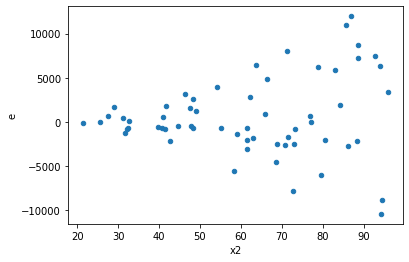

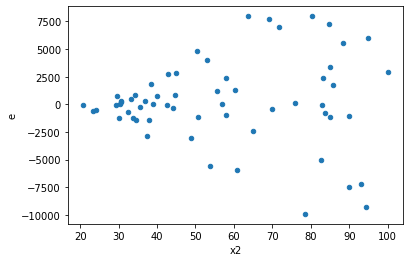

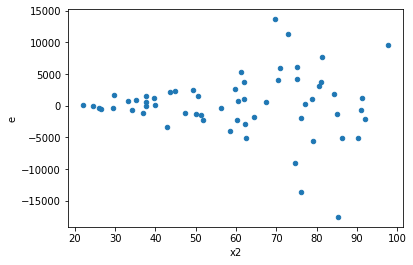

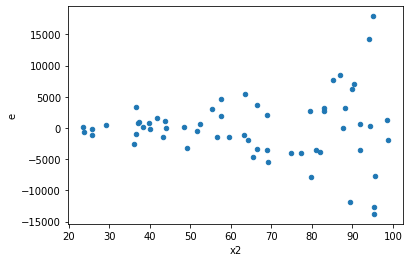

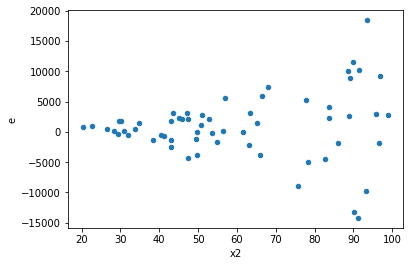

In [13]:
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [14]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
0.0,21.0,21.0,1041126649.7302042,53003426.873335324,52056332.48651021,2650171.3436667663,19.642628998653834,3.680469040645562e-09,0.9999999981597655,Reject005=0 : Heteroscedasticity
1.0,21.0,21.0,1864339397.9970586,58164626.44141316,93216969.89985293,2908231.3220706577,32.0528044631204,3.0912827853057934e-11,0.9999999999845436,Reject005=0 : Heteroscedasticity
2.0,21.0,21.0,1967041049.77908,31448155.457505025,98352052.488954,1572407.7728752512,62.54869391106531,3.6637359812630166e-14,0.9999999999999817,Reject005=0 : Heteroscedasticity
3.0,21.0,21.0,1586750982.7537825,10391977.943143787,79337549.13768913,519598.8971571893,152.68998754954612,2.220446049250313e-16,0.9999999999999999,Reject005=0 : Heteroscedasticity
4.0,21.0,21.0,924361481.4798062,32404040.04644925,46218074.07399031,1620202.0023224626,28.526118352982817,9.787348709267008e-11,0.9999999999510633,Reject005=0 : Heteroscedasticity
5.0,21.0,21.0,874231344.801266,39866918.008174844,43711567.240063295,1993345.9004087423,21.92874163540813,1.2760834611214023e-09,0.9999999993619583,Reject005=0 : Heteroscedasticity
6.0,21.0,21.0,675490536.9970644,26069975.821362283,33774526.84985322,1303498.791068114,25.910669868882394,2.516742370062275e-10,0.9999999998741629,Reject005=0 : Heteroscedasticity
7.0,21.0,21.0,1194075924.328202,37323482.69337367,59703796.2164101,1866174.1346686836,31.992618002397602,3.149480676256644e-11,0.9999999999842526,Reject005=0 : Heteroscedasticity
8.0,21.0,21.0,1320567673.3519669,49173353.54118923,66028383.667598344,2458667.6770594614,26.855351084522137,1.7717605160783023e-10,0.999999999911412,Reject005=0 : Heteroscedasticity


In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,21.0,21.0,1041126649.7302042,53003426.873335324,52056332.48651021,2650171.3436667663,19.642628998653834,3.680469040645562e-09,Reject005=0 : Heteroscedasticity
1.0,21.0,21.0,1864339397.9970586,58164626.44141316,93216969.89985293,2908231.3220706577,32.0528044631204,3.0912827853057934e-11,Reject005=0 : Heteroscedasticity
2.0,21.0,21.0,1967041049.77908,31448155.457505025,98352052.488954,1572407.7728752512,62.54869391106531,3.6637359812630166e-14,Reject005=0 : Heteroscedasticity
3.0,21.0,21.0,1586750982.7537825,10391977.943143787,79337549.13768913,519598.8971571893,152.68998754954612,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
4.0,21.0,21.0,924361481.4798062,32404040.04644925,46218074.07399031,1620202.0023224626,28.526118352982817,9.787348709267008e-11,Reject005=0 : Heteroscedasticity
5.0,21.0,21.0,874231344.801266,39866918.008174844,43711567.240063295,1993345.9004087423,21.92874163540813,1.2760834611214023e-09,Reject005=0 : Heteroscedasticity
6.0,21.0,21.0,675490536.9970644,26069975.821362283,33774526.84985322,1303498.791068114,25.910669868882394,2.516742370062275e-10,Reject005=0 : Heteroscedasticity
7.0,21.0,21.0,1194075924.328202,37323482.69337367,59703796.2164101,1866174.1346686836,31.992618002397602,3.149480676256644e-11,Reject005=0 : Heteroscedasticity
8.0,21.0,21.0,1320567673.3519669,49173353.54118923,66028383.667598344,2458667.6770594614,26.855351084522137,1.7717605160783023e-10,Reject005=0 : Heteroscedasticity


In [17]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    999
Reject005=1 : Homoscedasticity        1
Name: Result_test, dtype: int64